In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import semicircular
from IPython.display import HTML
import matplotlib
from skrmt.ensemble.spectral_law import MarchenkoPasturDistribution

mystyle = "https://raw.githubusercontent.com/quantgirluk/matplotlib-stylesheets/main/quant-pastel-light.mplstyle"
plt.style.use(mystyle)
plt.rcParams["figure.figsize"] = (10,5)


class RandomCovarianceMatrix:

    def __init__(self, n, random_state: int = None,):
        self.n = n
        self.random_state = random_state
        
        self._eigenvalues = None
        self._rows = self.n - 2 # The dimensions here are such the ration tendst to 2
        self._cols = 2*self.n
        self._ratio = self._rows/self._cols
        
        self.matrix = self.sample()

    def sample(self, random_state: int = None):
        if random_state is not None:
            np.random.seed(random_state)
        X = np.random.randn(self._rows, self._cols)
        self.matrix = np.matmul(X, X.transpose())/self._cols
        self._eigenvalues = None
        return self.matrix

    def eigenvalues(self) -> np.ndarray:
        if self._eigenvalues:
            return self._eigenvalues
        self._eigenvalues = np.linalg.eigvalsh(self.matrix)
        return self._eigenvalues

In [2]:
matrix0 = RandomCovarianceMatrix(n=500, random_state=123)
matrix0.matrix
matrix0._ratio

0.498

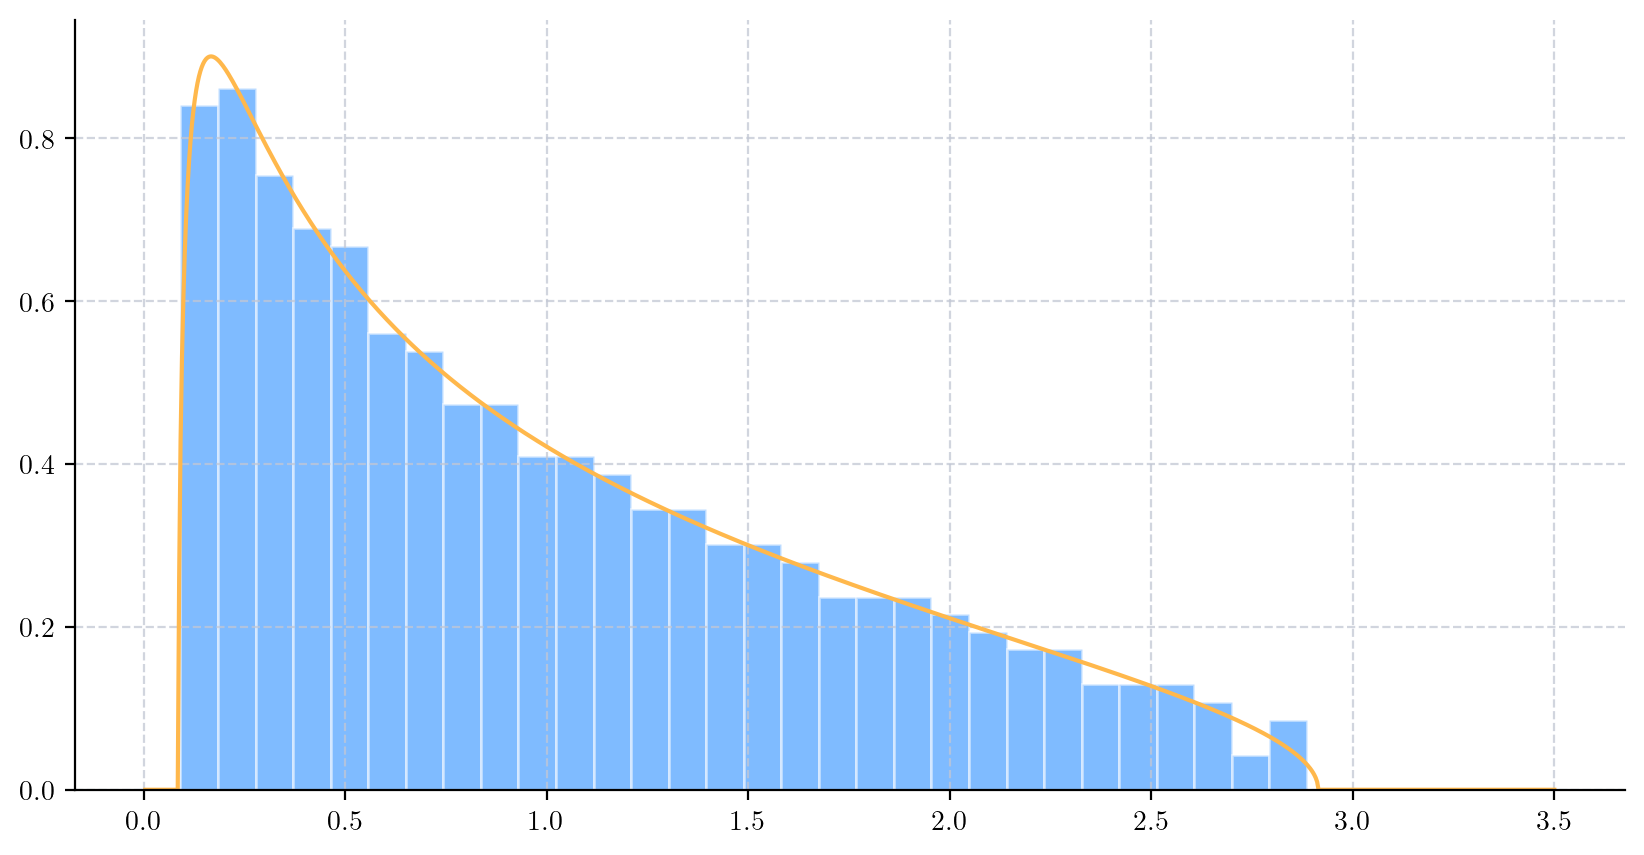

In [4]:
matrix0 = RandomCovarianceMatrix(n=500, random_state=123)
sample = matrix0.eigenvalues()
plt.hist(sample, density=True, ec="white", alpha=0.5, bins=30)
x = np.linspace(0, 3.5, 1000)
rv = MarchenkoPasturDistribution(beta=1, ratio=0.5, sigma=1.0)
plt.plot(x, rv.pdf(x), label=f"$\\lambda={0.5}$")
plt.show()

In [5]:
HIST_BINS = np.linspace(0, 3, 40)
matrix0 = RandomCovarianceMatrix(n=50, random_state=123)
data = matrix0.eigenvalues()

n, _ = np.histogram(data, HIST_BINS, density=True)

def prepare_animation(bar_container):
    def animate(frame_number):
        
        matrix = RandomCovarianceMatrix(n=frame_number)
        lambdan = matrix._ratio
        ax.set_title("Convergence to the Marchenko-Pastur Law \n $\\lambda_n$={:.4}".format(lambdan))
        data = matrix.eigenvalues()
        n, _ = np.histogram(data, HIST_BINS, density=True)

        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

In [5]:
matplotlib.use("TkAgg")

In [6]:
import moviepy.editor as mp

In [12]:
fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1, ec="white", fc="coral", alpha=0.5)
rv = MarchenkoPasturDistribution(beta=1, ratio=0.5, sigma=1.0)
x = np.linspace(0, 3.5, 1000)
ax.plot(x, rv.pdf(x), label="Probability Density Function", color="dodgerblue")
ax.set_ylim(top=1.0)  # set safe limit to ensure that all data is visible.

# frames = np.append( np.append( np.arange(10, 100, 10), np.arange(100, 501, 100)), [1000, 2000])
# ani = animation.FuncAnimation(fig, prepare_animation(bar_container), frames, repeat=False, blit=False, interval=800)

# To save the animation using Pillow as a gif
# writer = animation.PillowWriter(fps=2,
#                                 metadata=dict(artist='@Quant_Girl'),
#                                 bitrate=1800)
# ani.save('22_MarchenkoPastur.gif',writer=writer)

# HTML(ani.to_jshtml())